# Introduction to Tensors

In [1]:
import tensorflow as tf
import numpy as np

print("The version of Tensorflow: {}".format(tf.__version__))

The version of Tensorflow: 2.4.1


## 0. Basics

In [2]:
# Let's create some basic tensors.

# Here is a "scalar" or "rank-0" tensor . A scalar contains a single value, and no "axes".
# This will be an int32 tensor by default; see "dtypes" below.
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [3]:
# A "vector" or "rank-1" tensor is like a list of values. A vector has one axis:
# Let's make this a float tensor.
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


In [4]:
# A "matrix" or "rank-2" tensor has two axes:
# If you want to be specific, you can set the dtype (see below) at creation time
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [5]:
# Tensors may have more axes; here is a tensor with three axes:
# There can be an arbitrary number of
# axes (sometimes called "dimensions")
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


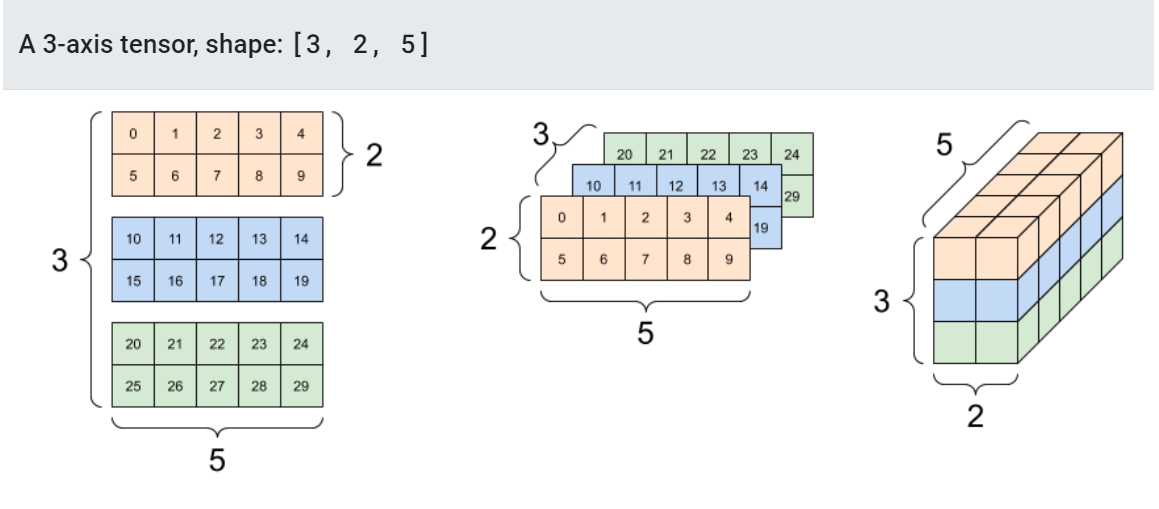

In [6]:
# There are many ways you might visualize a tensor with more than two axes.
from IPython.display import Image, display
display(Image(filename='./image/tensor.png', embed=True))

In [7]:
# You can convert a tensor to a NumPy array either using np.array or the tensor.numpy method:
np.array(rank_2_tensor)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [9]:
rank_3_tensor.numpy()

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [10]:
# You can do basic math on tensors, including addition, element-wise multiplication, and matrix multiplication.
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [11]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [12]:
# Tensors are used in all kinds of operations (ops).
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105854e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


## 1. About shapes

In [16]:
# Tensors and tf.TensorShape objects have convenient properties for accessing these:
rank_4_tensor = tf.zeros([3, 2, 4, 5])

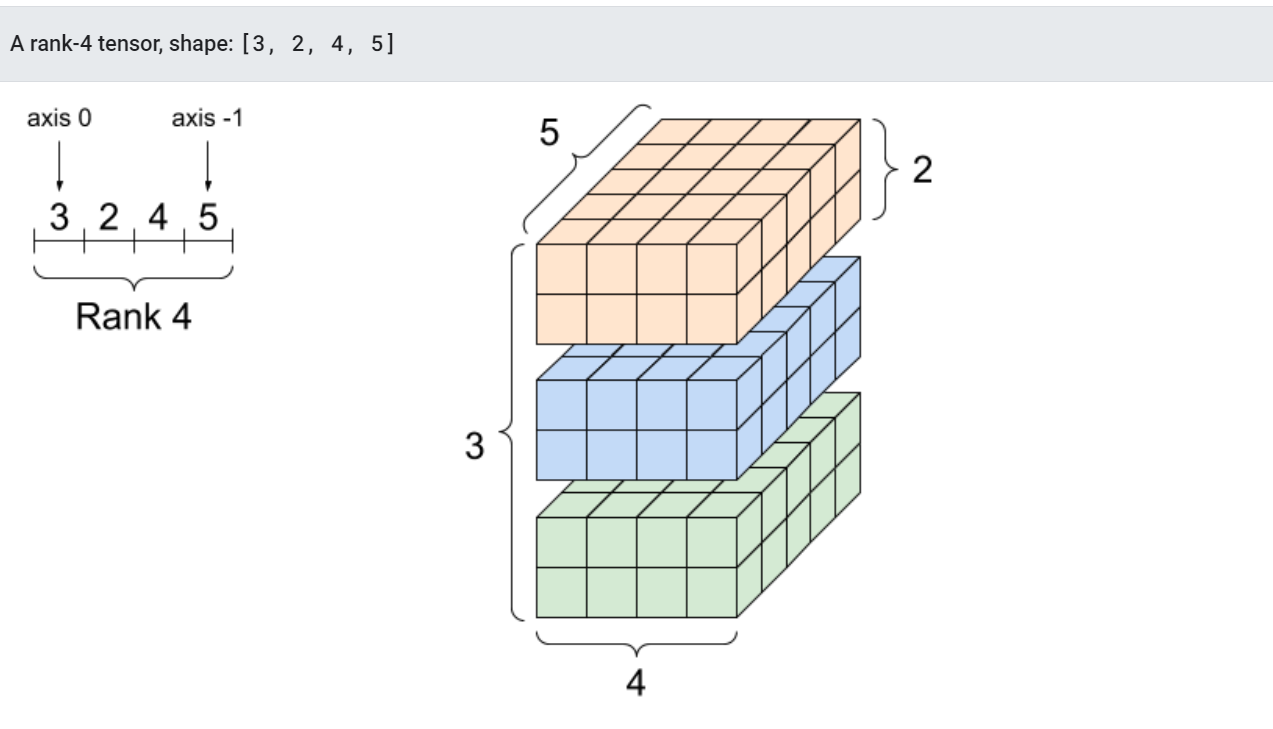

In [18]:
from IPython.display import Image, display
display(Image(filename="./image/tensorRank4.png", embed=True))

In [19]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


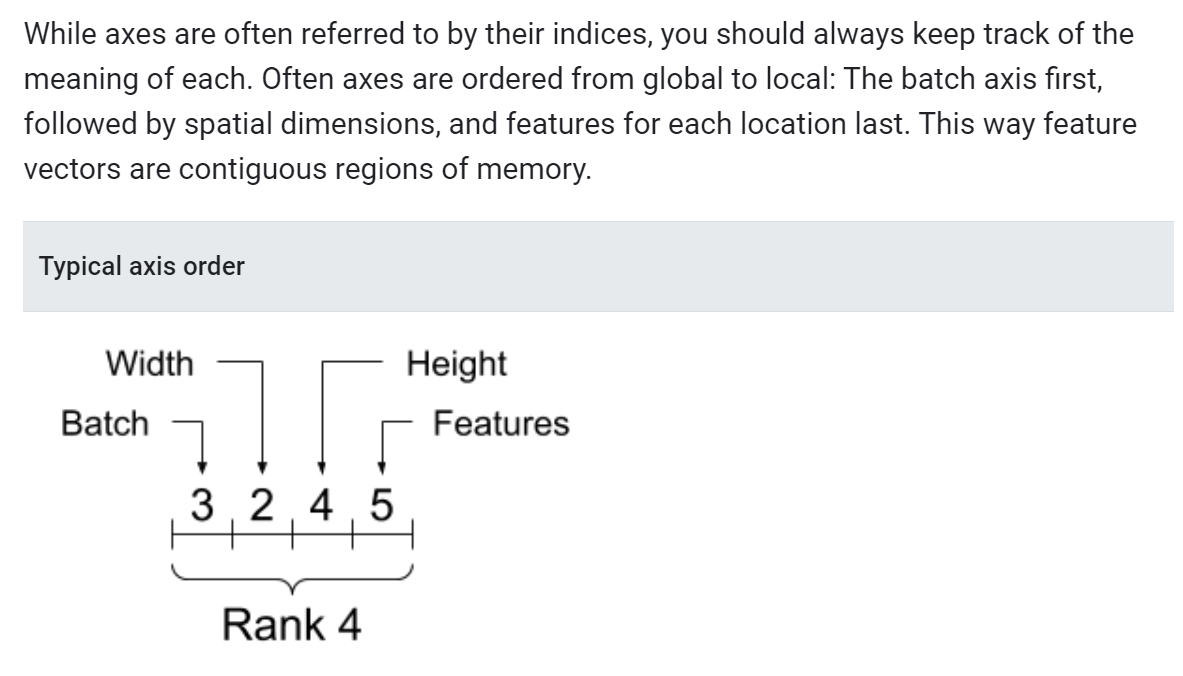

In [20]:
from IPython.display import Image, display
display(Image(filename="./image/axes.png", embed=True))

## 2. Indexing

### i. Single-axis indexing

In [21]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


In [22]:
# Indexing with a scalar removes the axis:
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())

First: 0
Second: 1
Last: 34


In [23]:
# Indexing with a : slice keeps the axis:
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


### ii. Multi-axis indexing

In [24]:
print(rank_2_tensor.numpy())

[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [25]:
# Passing an integer for each index, the result is a scalar.
# Pull out a single value from a 2-rank tensor
print(rank_2_tensor[1, 1].numpy())

4.0


In [26]:
# You can index using any combination of integers and slices:
# Get row and column tensors
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]] 



In [27]:
# Here is an example with a 3-axis tensor:
print(rank_3_tensor[:, :, 4])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)


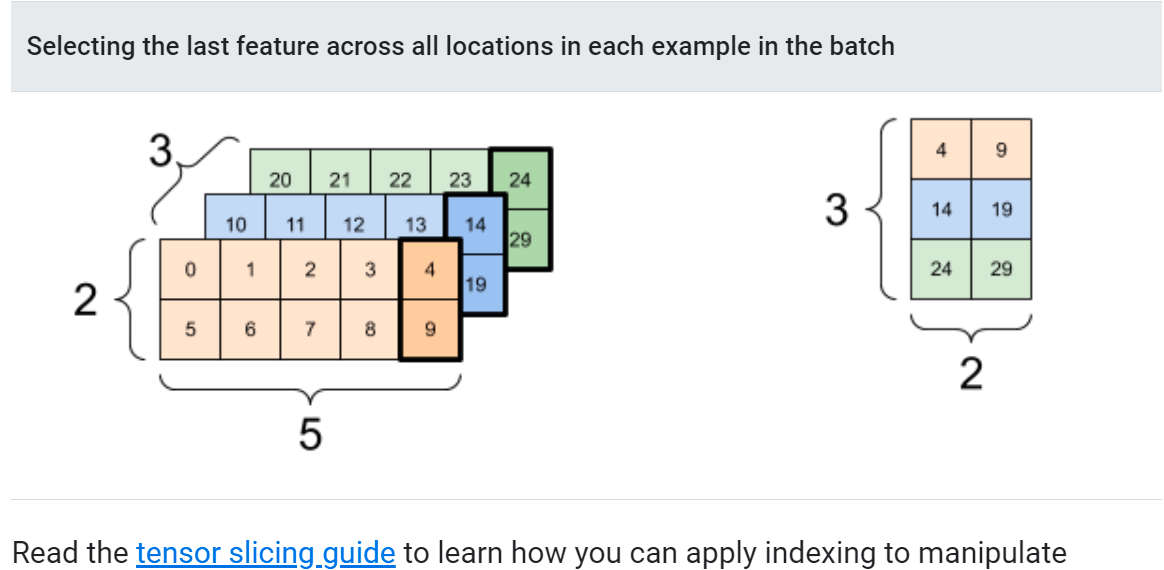

In [29]:
from IPython.display import Image, display
display(Image(filename="./image/selectTensor.png", embed=True))

## 3. Manipulating Shapes

In [30]:
# Reshaping a tensor is of great utility.

# Shape returns a `TensorShape` object that shows the size along each axis
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [31]:
# You can convert this object into a Python list, too
print(x.shape.as_list())

[3, 1]


In [33]:
# You can reshape a tensor into a new shape. 
# The tf.reshape operation is fast and cheap as the underlying data does not need to be duplicated.

# You can reshape a tensor to a new shape.
# Note that you're passing in a list
reshaped = tf.reshape(x, [1, 3])

print(x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


In [34]:
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


In [35]:
# If you flatten a tensor you can see what order it is laid out in memory.
# A `-1` passed in the `shape` argument says "Whatever fits".
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


In [36]:
# Typically the only reasonable use of tf.reshape is to combine or split adjacent axes (or add/remove 1s).

# For this 3x2x5 tensor, reshaping to (3x2)x5 or 3x(2x5) are both reasonable things to do, as the slices do not mix:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


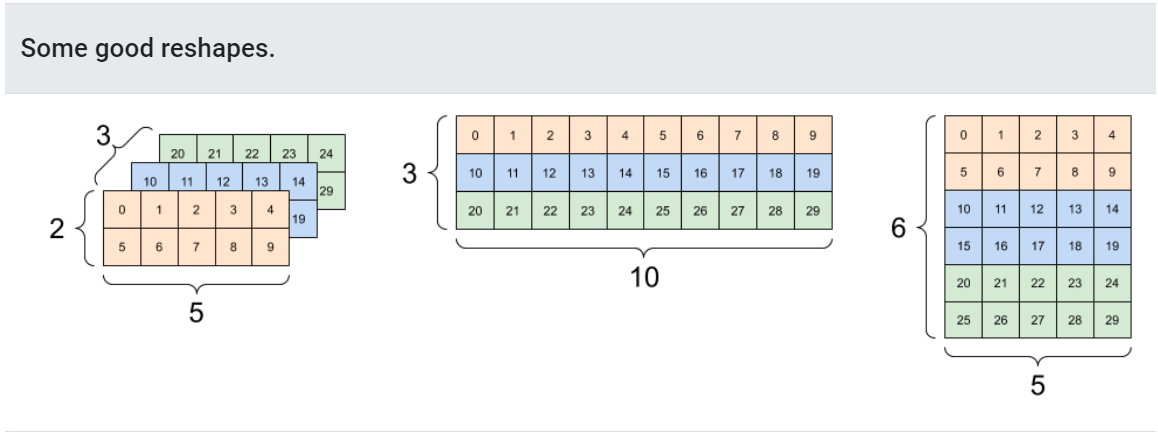

In [37]:
from IPython.display import Image, display
display(Image(filename="./image/reshape.png", embed=True))

In [38]:
# Bad examples: don't do this

# You can't reorder axes with reshape.
print(tf.reshape(rank_3_tensor, [2, 3, 5]), "\n") 

# This is a mess
print(tf.reshape(rank_3_tensor, [5, 6]), "\n")

# This doesn't work at all
try:
  tf.reshape(rank_3_tensor, [7, -1])
except Exception as e:
  print(f"{type(e).__name__}: {e}")

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]], shape=(5, 6), dtype=int32) 

InvalidArgumentError: Input to reshape is a tensor with 30 values, but the requested shape requires a multiple of 7 [Op:Reshape]


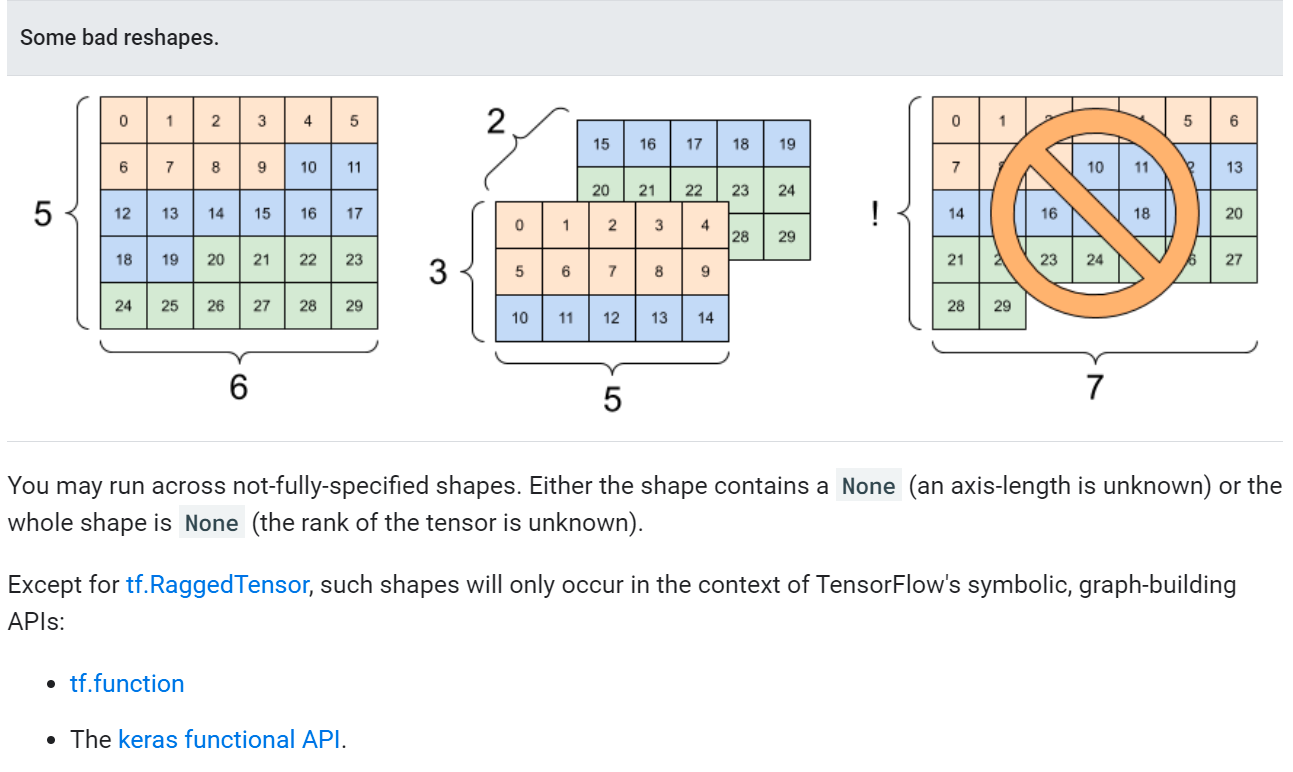

In [39]:
from IPython.display import Image, display
display(Image(filename="./image/reshapeBad.png", embed=True))

## 4. More on DTypes

In [40]:
# You can cast from type to type.

the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
# Now, cast to an uint8 and lose the decimal precision
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


## 5. Broadcasting

In [41]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


In [42]:
# These are the same computations
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


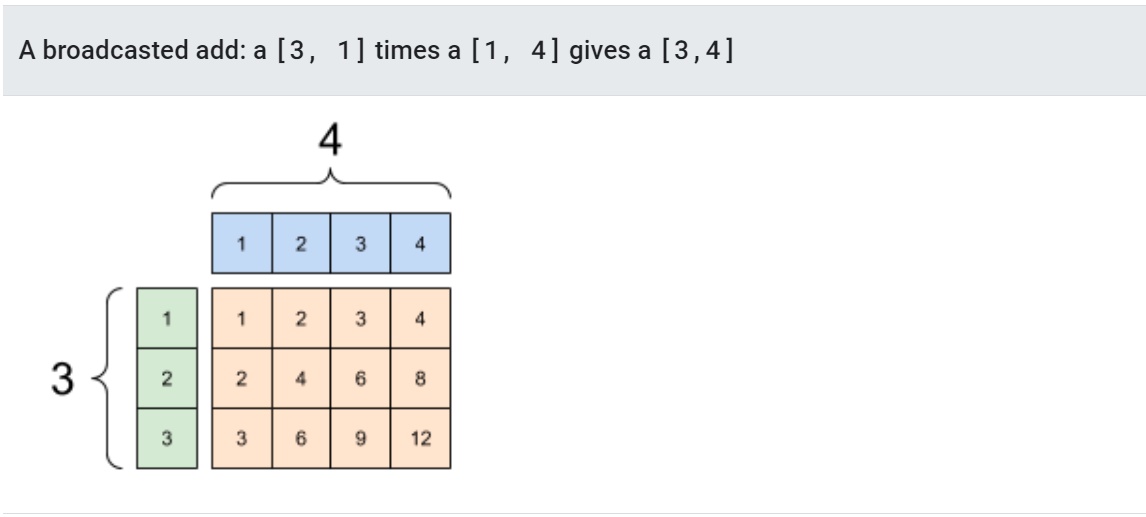

In [44]:
from IPython.display import Image, display
display(Image(filename="./image/boardcast.png", embed=True))

In [45]:
# Here is the same operation without broadcasting:
x_stretch = tf.constant([[1, 1, 1, 1],
                         [2, 2, 2, 2],
                         [3, 3, 3, 3]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

print(x_stretch * y_stretch)  # Again, operator overloading

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [46]:
# You see what broadcasting looks like using tf.broadcast_to.

print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


## 6. tf.convert_to_tensor

## 7. Ragged Tensors

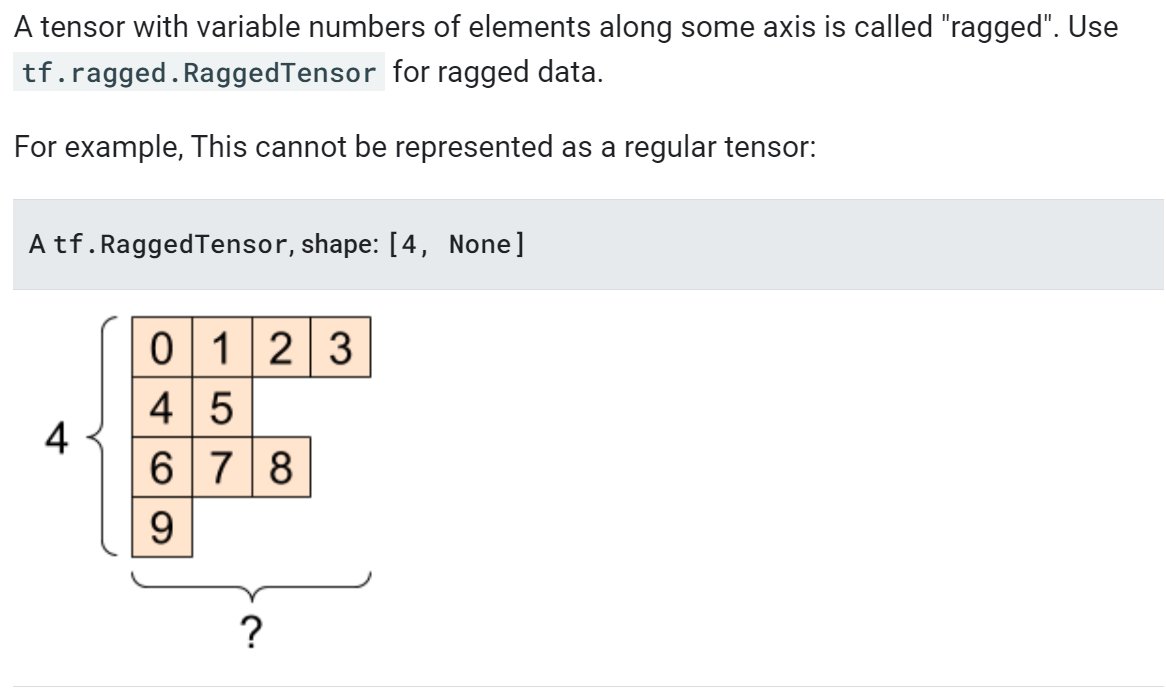

In [48]:
from IPython.display import Image, display
display(Image(filename="./image/raggedTensor.png", embed=True))

In [49]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

In [50]:
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Can't convert non-rectangular Python sequence to Tensor.


In [55]:
# Instead create a tf.RaggedTensor using tf.ragged.constant:

ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)
ragged_tensor

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>

In [54]:
# The shape of a tf.RaggedTensor will contain some axes with unknown lengths:

print(ragged_tensor.shape)
ragged_tensor.shape

(4, None)


TensorShape([4, None])

## 8. String tensors

In [56]:
# Here is a scalar string tensor:

# Tensors can be strings, too here is a scalar string.
scalar_string_tensor = tf.constant("Gray wolf")
print(scalar_string_tensor)
scalar_string_tensor

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


<tf.Tensor: shape=(), dtype=string, numpy=b'Gray wolf'>

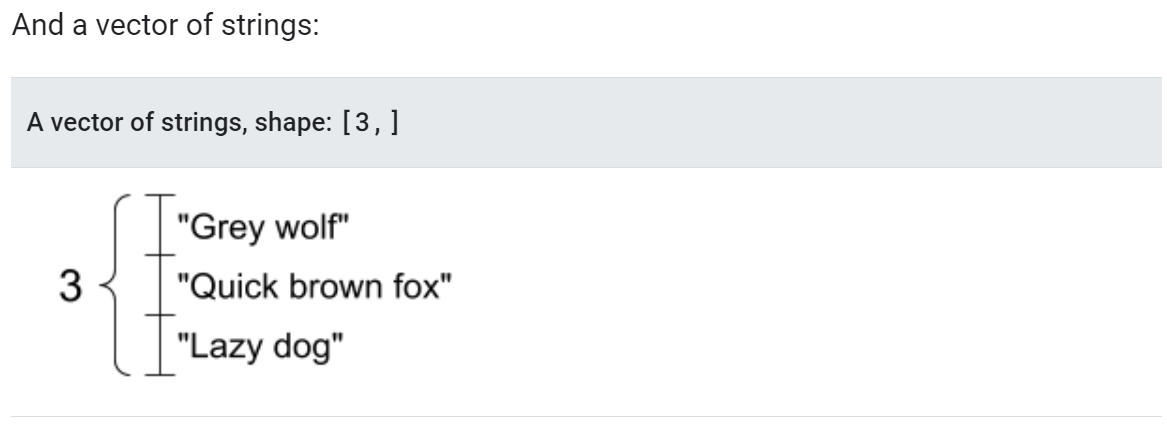

In [57]:
from IPython.display import Image, display
display(Image(filename="./image/stringTensor.png", embed=True))

In [58]:
# If you have three string tensors of different lengths, this is OK.
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
# Note that the shape is (3,). The string length is not included.
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


In [59]:
# If you pass unicode characters they are utf-8 encoded.

tf.constant("🥳👍")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'>

In [60]:
# Some basic functions with strings can be found in tf.strings, including tf.strings.split.

# You can use split to split a string into a set of tensors
print(tf.strings.split(scalar_string_tensor, sep=" "))

tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)


In [61]:
# ...but it turns into a `RaggedTensor` if you split up a tensor of strings,
# as each string might be split into a different number of parts.
print(tf.strings.split(tensor_of_strings))

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>


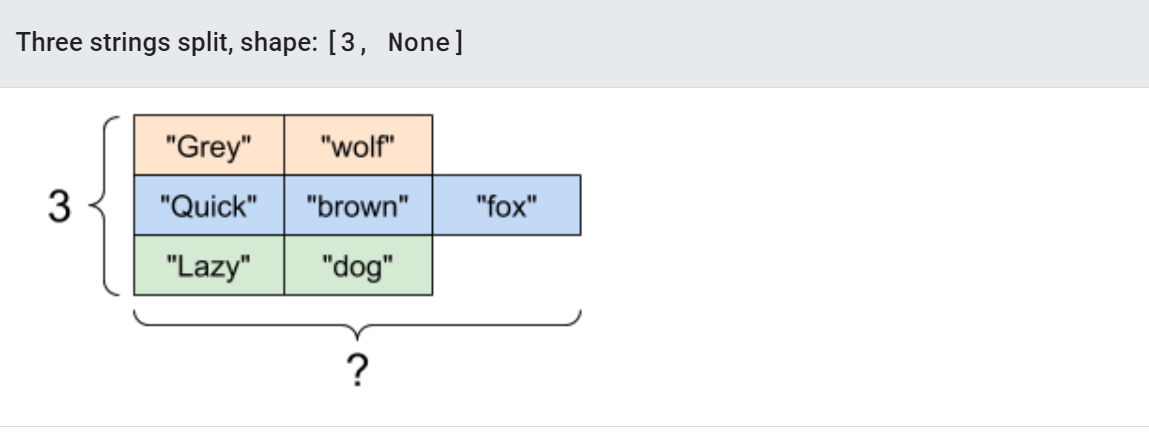

In [65]:
from IPython.display import Image, display
display(Image(filename="./image/raggedString.png", embed=True))

In [66]:
# And tf.string.to_number:

text = tf.constant("1 10 100")
print(tf.strings.to_number(tf.strings.split(text, " ")))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


In [67]:
# Although you can't use tf.cast to turn a string tensor into numbers, 
# you can convert it into bytes, and then into numbers.

byte_strings = tf.strings.bytes_split(tf.constant("Duck"))
byte_ints = tf.io.decode_raw(tf.constant("Duck"), tf.uint8)
print("Byte strings:", byte_strings)
print("Bytes:", byte_ints)

Byte strings: tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string)
Bytes: tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)


In [68]:
# Or split it up as unicode and then decode it
unicode_bytes = tf.constant("アヒル 🦆")
unicode_char_bytes = tf.strings.unicode_split(unicode_bytes, "UTF-8")
unicode_values = tf.strings.unicode_decode(unicode_bytes, "UTF-8")

print("\nUnicode bytes:", unicode_bytes)
print("\nUnicode chars:", unicode_char_bytes)
print("\nUnicode values:", unicode_values)


Unicode bytes: tf.Tensor(b'\xe3\x82\xa2\xe3\x83\x92\xe3\x83\xab \xf0\x9f\xa6\x86', shape=(), dtype=string)

Unicode chars: tf.Tensor([b'\xe3\x82\xa2' b'\xe3\x83\x92' b'\xe3\x83\xab' b' ' b'\xf0\x9f\xa6\x86'], shape=(5,), dtype=string)

Unicode values: tf.Tensor([ 12450  12498  12523     32 129414], shape=(5,), dtype=int32)


## 9. Sparse tensors

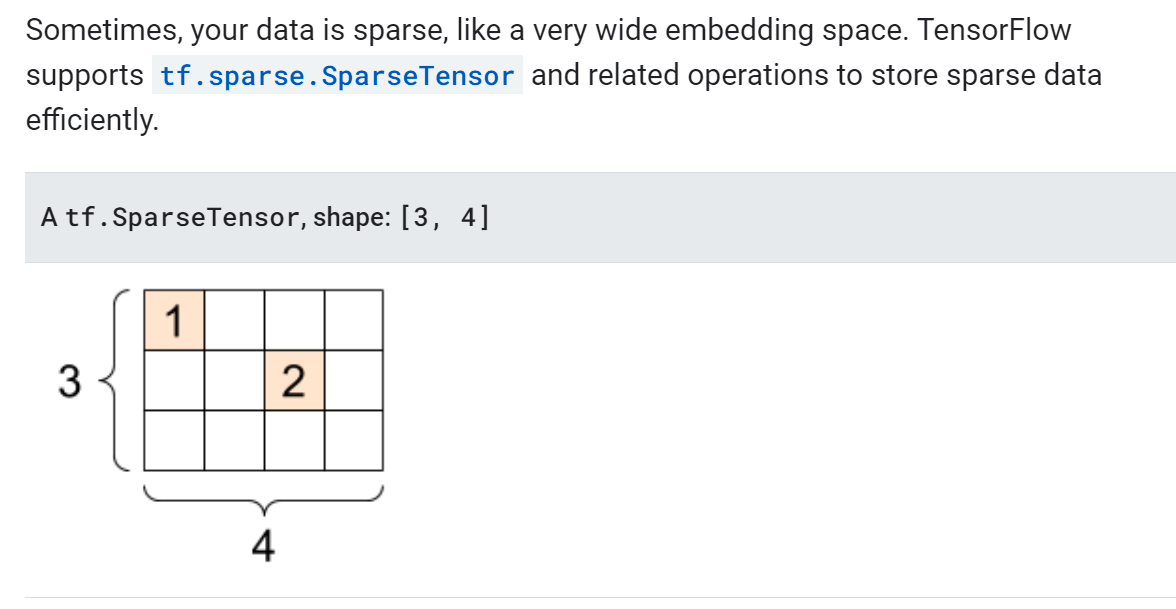

In [69]:
from IPython.display import Image, display
display(Image(filename="./image/sparseTensor.png", embed=True))

In [70]:
# Sparse tensors store values by index in a memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, "\n")

# You can convert sparse tensors to dense
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)


# reference 

### https://tensorflow.google.cn/guide/tensor